In [1]:
from scipy.optimize import curve_fit
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
t = pd.read_csv('./KO.csv', index_col=0)

In [3]:
t

,Day 0,Day 1,Day 2,Day 3,Day 1.1,Day 2.1,Day 3.1,Day 1.2,Day 2.2,Day 3.2
pH,7.54700,7.575000,7.558000,7.532000,7.542000,7.512000,7.467000,7.552000,7.546000,7.532000
Glucose(mmol/L),16.76325,17.540354,16.874265,16.374697,17.318324,16.485712,15.042519,17.040787,17.373832,16.652235
Lactate(mmol/L),0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,3.441385,0.000000,0.000000,0.000000
Glutamine(mmol/L),1.93000,1.980000,1.800000,1.690000,1.900000,1.570000,1.370000,1.920000,1.730000,1.590000
Glutamate(mmol/L),0.32000,0.000000,0.260000,0.250000,0.220000,0.460000,0.530000,0.000000,0.310000,0.250000
Na(mmol/L),149.00000,153.000000,157.000000,160.000000,153.000000,157.000000,160.000000,153.000000,156.000000,158.000000
K(mmol/L),4.20000,4.300000,4.400000,4.500000,4.300000,4.400000,4.500000,4.300000,4.400000,4.400000
NH4(mmol/L),0.41000,0.510000,0.620000,0.680000,0.540000,0.730000,0.900000,0.510000,0.640000,0.720000


In [4]:
def nonlinear_fit(x,a,b):
    return  b - a*np.exp(np.log(2)/21.78*24*x)

In [5]:
f = [
    'Glucose(mmol/L)', 
    'Glutamate(mmol/L)', 
#     'NH4(mmol/L)'
]

In [6]:
slope = []

### Control

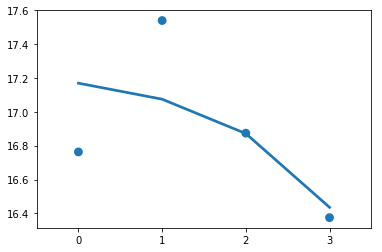

[17.16984885 17.07515664 16.87190795 16.43565211]
Glucose(mmol/L)
0.08259861766669982 17.252447471523467


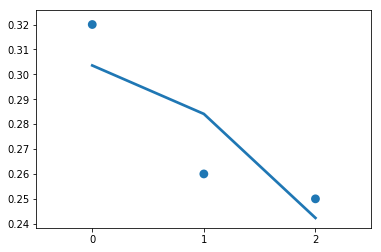

[0.30355831 0.28410176 0.24233993]
Glutamate(mmol/L)
0.016971667782344144 0.32052998220613677


In [7]:
vvv = []
for i in f:
    y=np.array(list(t[['Day 0', 'Day 1', 'Day 2', 'Day 3']].T[i]))
    y = [yy for yy in y if yy != 0]
    x=np.array([xx for xx in range(0, len(y))])
    param, cov = curve_fit(nonlinear_fit, x, y, p0=[1, 3])
    sns.pointplot(x=x, y=y, join=False)
    sns.pointplot(x=x, y=nonlinear_fit(x, param[0], param[1]), markers="")
    plt.show()
    print(nonlinear_fit(x, param[0], param[1]))
    print(i)
    print(param[0], param[1])
    vvv.append(param[0])
slope.append(vvv)

### Clone A

In [8]:
def nonlinear_fit(x,a,b):
    return  b - a*np.exp(np.log(2)/12.8*24*x)

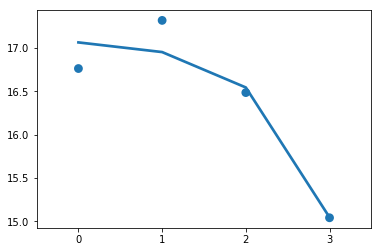

[17.06440117 16.95310406 16.54486449 15.04743512]
Glucose(mmol/L)
0.0417153031955904 17.10611647055362


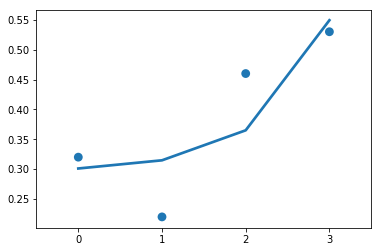

[0.3010399  0.31473621 0.36497451 0.54924939]
Glutamate(mmol/L)
-0.005133519350589648 0.29590637716444207


In [9]:
vvv = []
for i in f:
    y=np.array(list(t[['Day 0', 'Day 1.1', 'Day 2.1', 'Day 3.1']].T[i]))
    y = [yy for yy in y if yy != 0]
    x=np.array([xx for xx in range(0, len(y))])
    param, cov = curve_fit(nonlinear_fit, x, y, p0=[1, 3])
    sns.pointplot(x=x, y=y, join=False)
    sns.pointplot(x=x, y=nonlinear_fit(x, param[0], param[1]), markers="")
    plt.show()
    print(nonlinear_fit(x, param[0], param[1]))
    print(i)
    print(param[0], param[1])
    vvv.append(param[0])
slope.append(vvv)

### Clone B

In [10]:
def nonlinear_fit(x,a,b):
    return  b - a*np.exp(np.log(2)/16.84*24*x)

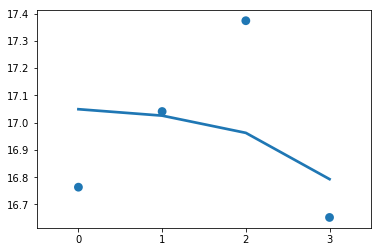

[17.0492106  17.02567561 16.96247294 16.79274366]
Glucose(mmol/L)
0.01396340408687743 17.063174001169127


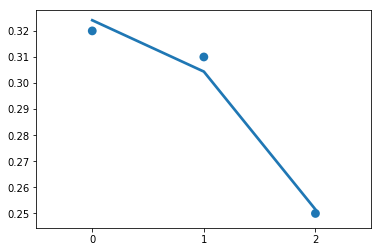

[0.32408409 0.30439511 0.25152081]
Glutamate(mmol/L)
0.011681551754142924 0.33576563995607706


In [11]:
vvv = []
for i in f:
    y=np.array(list(t[['Day 0', 'Day 1.2', 'Day 2.2', 'Day 3.2']].T[i]))
    y = [yy for yy in y if yy != 0]
    x=np.array([xx for xx in range(0, len(y))])
    param, cov = curve_fit(nonlinear_fit, x, y, p0=[1, 3])
    sns.pointplot(x=x, y=y, join=False)
    sns.pointplot(x=x, y=nonlinear_fit(x, param[0], param[1]), markers="")
    plt.show()
    print(nonlinear_fit(x, param[0], param[1]))
    print(i)
    print(param[0], param[1])
    vvv.append(param[0])
slope.append(vvv)

In [12]:
slope

[[0.08259861766669982, 0.016971667782344144],
 [0.0417153031955904, -0.005133519350589648],
 [0.01396340408687743, 0.011681551754142924]]

In [13]:
pd.DataFrame(slope, columns=['Glucose', 'Glutamate'], index=['Control', 'Clone A', 'Clone B']).to_csv('./result/slope.csv')